<a href="https://colab.research.google.com/github/stutigarg1/FMML-Projects-and-Assignments/blob/main/M1_Lab_1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Extracting features from data
!pip -q install wikipedia nltk matplotlib plotly pandas

import re
import nltk
import wikipedia
import numpy as np
import unicodedata
import pandas as pd
import plotly.express as px
from nltk.util import ngrams
import matplotlib.pyplot as plt
from collections import Counter

  Preparing metadata (setup.py) ... done


Part 1: Features of text

In [ ]:
#Feature Extraction
topic1 = "Giraffe"
topic2 = "Elephant"

wikipedia.set_lang("en")
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang("fr")
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

In [ ]:
eng1 #Giraffe (English)

'the giraffe is a large african hoofed mammal belonging to the genus giraffa it is the tallest living terrestrial animal and the largest ruminant on earth traditionally giraffes have been thought of as one species giraffa camelopardalis with nine subspecies most recently researchers proposed dividing them into four extant species due to new research into their mitochondrial and nuclear dna and individual species can be distinguished by their fur coat patterns seven other extinct species of giraffa are known from the fossil record\nthe giraffes distinguishing characteristics are its extremely long neck and legs hornlike ossicones and spotted coat patterns it is classified under the family giraffidae along with its closest extant relative the okapi its scattered range extends from chad in the north to south africa in the south and from niger in the west to somalia in the east giraffes usually inhabit savannahs and woodlands their food source is leaves fruits and flowers of woody plants p

In [ ]:
fr2[:100] #Elephants (French)

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent au'

In [ ]:
# Only sticking with 26 letters in both English and French (since French has accents as well)
def cleanup(text):
    text = text.lower()
    text = re.sub(
        r"[^a-z\s]", "", text
    )
    return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
eng2[:500]

'elephants are the largest living land animals three living species are currently recognised the african bush elephant loxodonta africana the african forest elephant l cyclotis and the asian elephant elephas maximus they are the only surviving members of the family elephantidae and the order proboscidea extinct relatives include mammoths and mastodons distinctive features of elephants include a long proboscis called a trunk tusks large ear flaps pillarlike legs and tough but sensitive grey skin t'

In [ ]:
fr2[:500]

'les lphants sont des mammifres proboscidiens de la famille des lphantids ils correspondent aujourdhui  trois espces rparties en deux genres distincts llphant de savane dafrique et llphant de fort dafrique autrefois regroups sous la mme espce d lphant dafrique  appartiennent au genre loxodonta tandis que llphant dasie anciennement appel  lphant indien  appartient au genre elephas ils se diffrencient par certaines caractristiques anatomiques les lphants dasie tant en gnral plus petits avec des ore'

In [ ]:
#N grams
def tuple2string(tup):
    # ('t', 'h') - > 'th'
    st = ""
    for ii in tup:
        st = st + ii
    return st

def key2string(keys):
    return [tuple2string(i) for i in keys]

def get_ngram_freq(ngram):
    keys = key2string(ngram.keys())
    values = list(ngram.values())
    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[0])
    keys, values = map(list, zip(*zipped_sorted))
    return keys, values

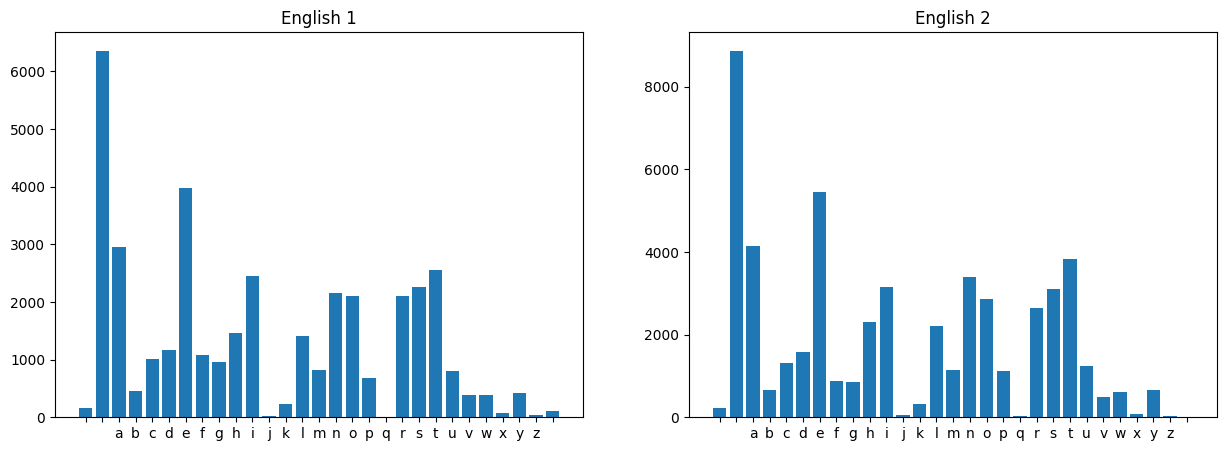

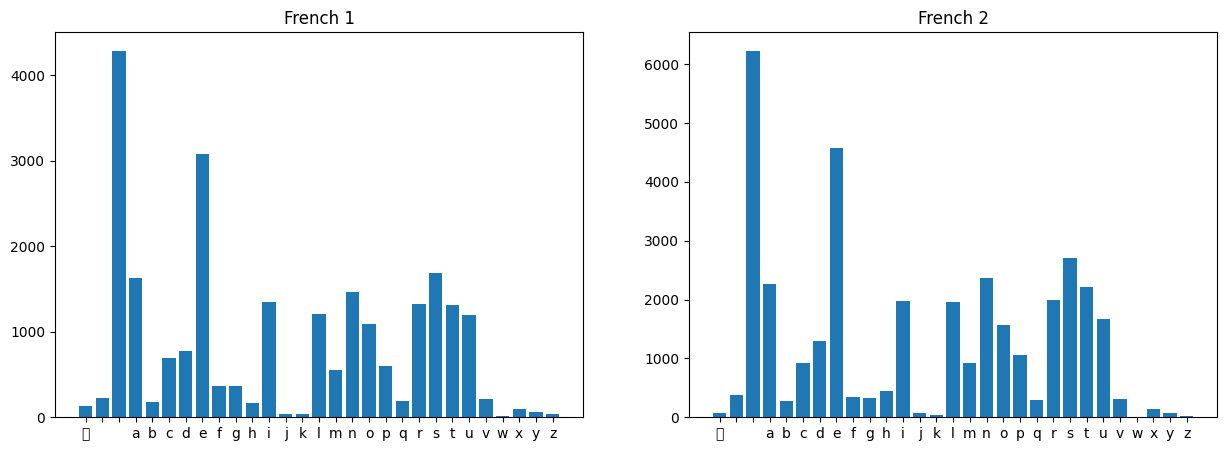

In [ ]:
#Comparing both English and French pages using Histograms---> UNIGRAM
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_eng1 = Counter(ngrams(eng1, 1))
keys, values = get_ngram_freq(unigram_eng1)
axs[0].bar(keys, values)
axs[0].set_title("English 1")

unigram_eng2 = Counter(ngrams(eng2, 1))
keys, values = get_ngram_freq(unigram_eng2)
axs[1].bar(keys, values)
axs[1].set_title("English 2")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_fr1 = Counter(ngrams(fr1, 1))
keys, values = get_ngram_freq(unigram_fr1)
axs[0].bar(keys, values)
axs[0].set_title("French 1")

unigram_fr2 = Counter(ngrams(fr2, 1))
keys, values = get_ngram_freq(unigram_fr2)
axs[1].bar(keys, values)
axs[1].set_title("French 2")
plt.show()

***Task: Spot the Difference***

Here, if we were to compare English-1 and French-1 pages corresponding to the content about Giraffe, we can notice similarity among the two unigrams. For example, a is slighly bigger in English-1 and slighly smaller in French-1 whereas, q is nearly zero in the first and slighly bigger in the second. The difference between the values of the two unigrams is adequate enough, implying their similarity index.

Same is applicable in English-2 and French-2 pages corresponding to the content about Elephant.

**Result: Therefore, Unigram is not a good feature as it is not able to differentiate between the two pages.**

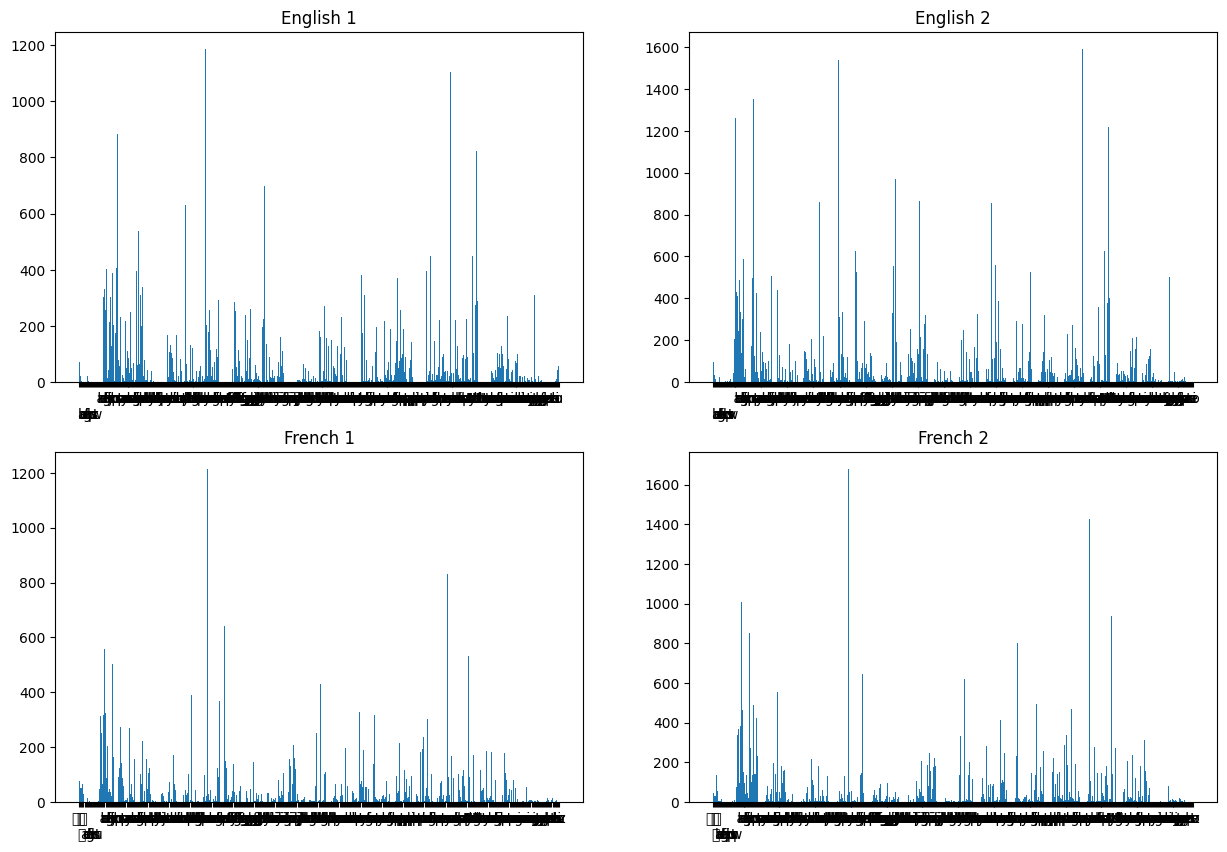

In [ ]:
#Comparing both English and French pages using Histograms---> BIGRAM
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1 = Counter(ngrams(eng1, 2))
keys, values = get_ngram_freq(bigram_eng1)
axs[0, 0].bar(keys, values)
axs[0, 0].set_title("English 1")

bigram_eng2 = Counter(ngrams(eng2, 2))
keys, values = get_ngram_freq(bigram_eng2)
axs[0, 1].bar(keys, values)
axs[0, 1].set_title("English 2")

bigram_fr1 = Counter(ngrams(fr1, 2))
keys, values = get_ngram_freq(bigram_fr1)
axs[1, 0].bar(keys, values)
axs[1, 0].set_title("French 1")

bigram_fr2 = Counter(ngrams(fr2, 2))
keys, values = get_ngram_freq(bigram_fr2)
axs[1, 1].bar(keys, values)
axs[1, 1].set_title("French 2")
plt.show()

As in the case of bigrams, if we were to compare English-1 and French-1 pages corresponding to the content about Giraffe, we can notice that the peaks of English-1 are higher than in the case of French-1, indicating some dissimilarity.

Same is applicable in English-2 and French-2 pages corresponding to the content about Elephant.

**Result: Therefore, Bigram is a good feature as it is able to differentiate between the two pages. But, I think a higher n-gram could increase the chances for distinguishing two documents easily.**

In [ ]:
#Visualizing in 2-D graph
def get_2D_ngram_freq(ngram):
    freq = np.zeros((26, 26))
    for ii in range(26):
        for jj in range(26):
            freq[ii, jj] = ngram[(chr(ord("a") + ii), chr(ord("a") + jj))]
    return freq

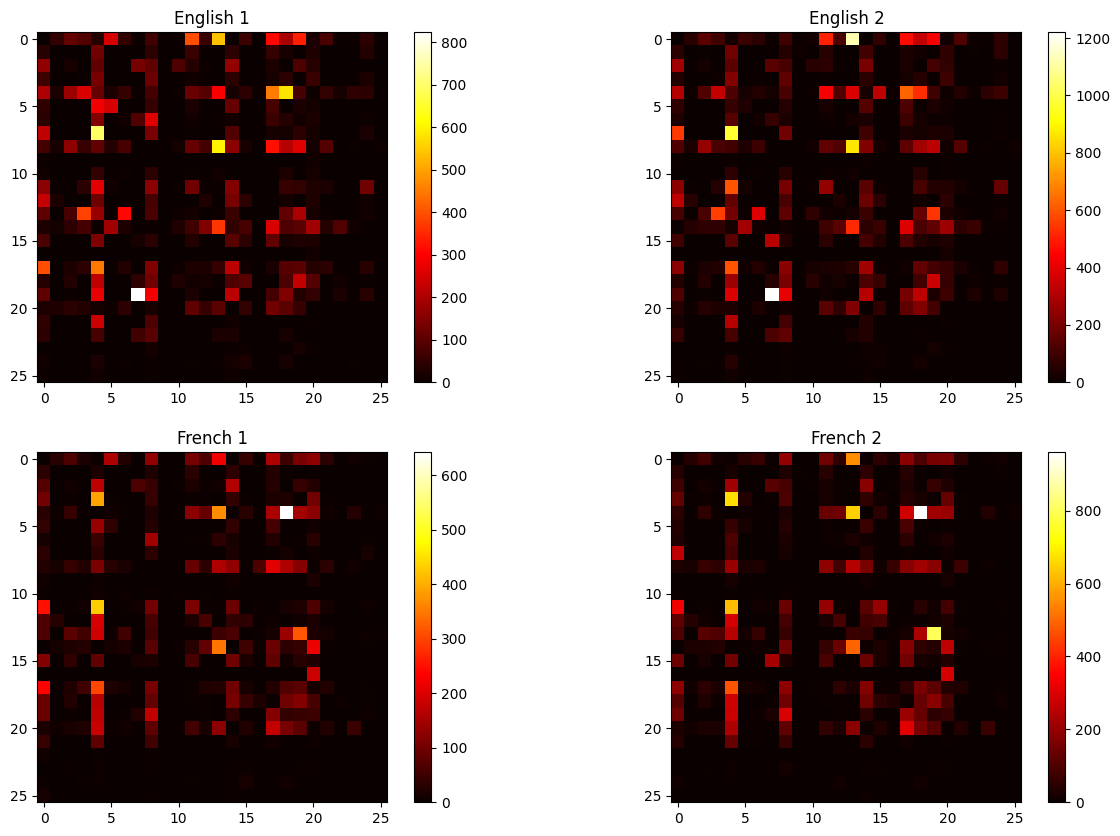

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_eng1_freq = get_2D_ngram_freq(bigram_eng1)
fig.colorbar(axs[0, 0].imshow(bigram_eng1_freq, cmap="hot"), ax=axs[0, 0])
axs[0, 0].set_title("English 1")

bigram_eng2_freq = get_2D_ngram_freq(bigram_eng2)
fig.colorbar(axs[0, 1].imshow(bigram_eng2_freq, cmap="hot"), ax=axs[0, 1])
axs[0, 1].set_title("English 2")

bigram_fr1_freq = get_2D_ngram_freq(bigram_fr1)
fig.colorbar(axs[1, 0].imshow(bigram_fr1_freq, cmap="hot"), ax=axs[1, 0])
axs[1, 0].set_title("French 1")

bigram_fr2_freq = get_2D_ngram_freq(bigram_fr2)
fig.colorbar(axs[1, 1].imshow(bigram_fr2_freq, cmap="hot"), ax=axs[1, 1])
axs[1, 1].set_title("French 2")
plt.show()

In [ ]:
# Top 10 ngrams for each text
def ind2tup(ind):
    ind = int(ind)
    i = int(ind / 26)
    j = int(ind % 26)
    return (chr(ord("a") + i), chr(ord("a") + j))

def ShowTopN(bifreq, n=10):
    f = bifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        print(f"{ind2tup(arg[ii])} : {f[arg[ii]]}")

In [ ]:
print("\nEnglish 1:")
ShowTopN(bigram_eng1_freq)

print("\nEnglish 2:")
ShowTopN(bigram_eng2_freq)

print("\nFrench 1:")
ShowTopN(bigram_fr1_freq)

print("\nFrench 2:")
ShowTopN(bigram_fr2_freq)


English 1:
('t', 'h') : 823.0
('h', 'e') : 697.0
('i', 'n') : 601.0
('e', 's') : 579.0
('a', 'n') : 539.0
('e', 'r') : 451.0
('r', 'e') : 449.0
('r', 'a') : 396.0
('a', 'l') : 396.0
('n', 'd') : 380.0

English 2:
('t', 'h') : 1220.0
('a', 'n') : 1122.0
('h', 'e') : 970.0
('i', 'n') : 867.0
('e', 'r') : 628.0
('r', 'e') : 599.0
('l', 'e') : 597.0
('n', 'd') : 561.0
('h', 'a') : 552.0
('n', 't') : 540.0

French 1:
('e', 's') : 642.0
('l', 'e') : 431.0
('d', 'e') : 392.0
('e', 'n') : 370.0
('o', 'n') : 348.0
('n', 't') : 318.0
('r', 'e') : 301.0
('l', 'a') : 250.0
('r', 'a') : 237.0
('a', 'n') : 223.0

French 2:
('e', 's') : 960.0
('n', 't') : 801.0
('d', 'e') : 671.0
('e', 'n') : 646.0
('l', 'e') : 620.0
('a', 'n') : 554.0
('o', 'n') : 494.0
('r', 'e') : 469.0
('l', 'a') : 333.0
('u', 'r') : 311.0


**Explore: Trying it with different languages.**

Suppose we take three regional languages in India- Hindi, Telugu and Punjabi.

In [ ]:
!pip -q install wikipedia nltk matplotlib plotly pandas

import re
import nltk
import wikipedia
import numpy as np
import unicodedata
import pandas as pd
import plotly.express as px
from nltk.util import ngrams
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done


**Explore: Taking topics that are not related to each other and retrieving this information from pages other than Wikipedia.**

Suppose, we take our topic-1 as '**Hibiscus'** and topic-2 as '**Volcanoes'**.

Content about 'Hibiscus' from https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/hibiscus


Content about 'Volcanoes' from https://www.nationalgeographic.com/environment/article/volcanoes




In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.nationalgeographic.com/environment/article/volcanoes'
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    # Extract the title of the page
    title = soup.find('title').text
    print(f'Page Title: {title}')

    # Example: Extract all paragraphs
    paragraphs = soup.find_all('p')
    for p in paragraphs:
        print(p.get_text())
else:
    print(f'Failed to retrieve data: {response.status_code}')

Page Title: Volcano facts and information
These fiery peaks have belched up molten rock, hot ash, and gas since Earth formed billions of years ago.
Volcanoes are Earth's geologic architects. They've created more than 80 percent of our planet's surface, laying the foundation that has allowed life to thrive. Their explosive force crafts mountains as well as craters. Lava rivers spread into bleak landscapes. But as time ticks by, the elements break down these volcanic rocks, liberating nutrients from their stony prisons and creating remarkably fertile soils that have allowed civilizations to flourish.
There are volcanoes on every continent, even Antarctica. Some 1,500 volcanoes are still considered potentially active around the world today; 161 of those—over 10 percent—sit within the boundaries of the United States.
But each volcano is different. Some burst to life in explosive eruptions, like the 1991 eruption of Mount Pinatubo, and others burp rivers of lava in what's known as an effusi

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.britannica.com/plant/hibiscus'
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    # Extract the title of the page
    title = soup.find('title').text
    print(f'Page Title: {title}')

    # Example: Extract all paragraphs
    paragraphs = soup.find_all('p')
    for p in paragraphs:
        print(p.get_text())
else:
    print(f'Failed to retrieve data: {response.status_code}')

Page Title: Hibiscus | Description, Species, & Uses | Britannica
Our editors will review what you’ve submitted and determine whether to revise the article.
Our editors will review what you’ve submitted and determine whether to revise the article.
hibiscus,  (genus Hibiscus),  genus of numerous species of herbs, shrubs, and trees in the mallow family (Malvaceae) that are native to warm temperate and tropical regions. Several are cultivated as ornamentals for their showy flowers, and a number are useful as fibre plants.
The leaves are often lobed and may be smooth or covered in trichomes (plant hairs). The flowers can be borne singly or in clusters, and the flowers of many species last only a single day. An epicalyx (whorl of leaflike bracts that surrounds the sepals) is particularly common, and the stamens are typically fused into a tube. Members of the genus characteristically have spiny pollen, and their fruits are capsules.
The tropical Chinese hibiscus, or China rose (Hibiscus rosa-

In [ ]:
topic1 = "Hibiscus"
topic2 = "Volcanoes"

brittanica.set_lang("en")

eng1 = brittanica.page(topic1).content
eng2 = brittanica.page(topic2).content

brittanica.set_lang("fr")

fr1 = brittanica.page(topic1).content
fr2 = brittanica.page(topic2).content

NameError: name 'brittanica' is not defined

In [ ]:
topic1 = "Hibiscus"
topic2 = "Volcanoes"

# English content from Britannica
eng1_title, eng1_content = get_britannica_content(topic1, lang='eng')
eng2_title, eng2_content = get_britannica_content(topic2, lang='eng')

print(f"English - {topic1} Title:\n{eng1_title}\n")
print(f"English - {topic1} Content:\n{eng1_content}\n")
print(f"English - {topic2} Title:\n{eng2_title}\n")
print(f"English - {topic2} Content:\n{eng2_content}\n")

English - Hibiscus Title:
Hibiscus | Description, Species, & Uses | Britannica

English - Hibiscus Content:
Our editors will review what you’ve submitted and determine whether to revise the article.
Our editors will review what you’ve submitted and determine whether to revise the article.
hibiscus,  (genus Hibiscus),  genus of numerous species of herbs, shrubs, and trees in the mallow family (Malvaceae) that are native to warm temperate and tropical regions. Several are cultivated as ornamentals for their showy flowers, and a number are useful as fibre plants.
The leaves are often lobed and may be smooth or covered in trichomes (plant hairs). The flowers can be borne singly or in clusters, and the flowers of many species last only a single day. An epicalyx (whorl of leaflike bracts that surrounds the sepals) is particularly common, and the stamens are typically fused into a tube. Members of the genus characteristically have spiny pollen, and their fruits are capsules.
The tropical Chin

In [ ]:
#Going back to using wikipedia pages
topic1 = "Hibiscus"
topic2 = "Volcano"

wikipedia.set_lang("hi")

hi1 = wikipedia.page(topic1).content
hi2 = wikipedia.page(topic2).content

wikipedia.set_lang("te")

te1 = wikipedia.page(topic1).content
te2 = wikipedia.page(topic2).content


wikipedia.set_lang("pa")

pa1 = wikipedia.page(topic1).content
pa2 = wikipedia.page(topic2).content

In [ ]:
hi2[:350] #Hindi

'ताल ज्वालामुखी (Taal Volcano) दक्षिणपूर्व एशिया के फ़िलिपीन्ज़ देश के लूज़ोन द्वीप पर स्थित एक ज्वालामुखी है। यह फ़िलिपीन्ज़ का दूसरा सबसे सक्रीय ज्वालामुखी है जिसके ३३ ज्ञात विस्फोट हो चुके हैं। इसके क्रेटर में एक ज्वालामुखीय झील है जो ताल झील कहलाती है।\n\n\n== इन्हें भी देखें ==\nलूज़ोन\nसक्रीय ज्वालामुखी\n\n\n== सन्दर्भ =='

In [ ]:
te2[:350] #Telugu

'బ్యారెన్ ఐలాండ్ అండమాన్ సముద్రంలో ఉన్న ఒక ద్వీపం. బంజరు ద్వీపం అన్ని దీనర్థం. ఇది దక్షిణ ఆసియాలోని ఏకైక క్రియాశీల అగ్నిపర్వతం,  సుమత్రా నుండి మయన్మార్ వరకూ ఉన్న అగ్నిపర్వతాల గొలుసులోని ఏకైక చురుకైన అగ్నిపర్వతం. ఇది భారత కేంద్రపాలిత ప్రాంతమైన అండమాన్ నికోబార్ దీవులలో భాగం. అండమాన్ రాజధాని పోర్ట్ బ్లెయిర్ నుండి ఈశాన్యంగా 138 కి.మీ. దూరంలో ఉంది. \n\n\n=='

In [ ]:
pa1[:350] #Punjabi

'ਚੀਮਾਮਾਂਡਾ ਨਗੋਜ਼ੀ ਆਦੀਚੀਏ (ਅੰਗ੍ਰੇਜ਼ੀ: Chimamanda Ngozi Adichie) ਇੱਕ ਨਾਈਜੀਰੀਆਈ ਲਿਖਾਰੀ ਹੈ। ਉਸ ਦਾ ਜਨਮ 15 ਸਤੰਬਰ 1977 ਵਿੱਚ ਅਨਾਮਬਾਰਾ (Anambra) ਸੂਬੇ ਦੇ ਅੱਬਾ ਕਸਬੇ ਵਿਖੇ ਹੋਇਆ। ਉਹ ਨਸੁਕਾ (Nsukka) ਨਾਂ ਦੇ ਯੂਨੀਵਰਸਿਟੀ ਟਾਊਨ ਵਿੱਚ ਪਲੀ, ਜਿੱਥੇ ਉਸ ਨੇ ਦਵਾਈਆਂ ਅਤੇ ਫਾਰਮੇਸੀ ਦੀ ਪੜ੍ਹਾਈ ਕੀਤੀ। ਆਦੀਚੀਏ ਦਾ ਪਹਿਲਾ ਨਾਵਲ 2003 ਵਿੱਚ ਪਬਲਿਸ਼ ਹੋਇਆ ਜਿਸਦਾ ਨਾਂ ਪਰਪਲ ਹਿਬੀਸਕਸ ਸੀ। ਇਸ ਨੂੰ ਔਰੇਂਜ ਪ੍ਰਾਈ'

In [ ]:

def tuple2string(tup):
    # convert a tuple of characters to a string
    # ('t', 'h') - > 'th'
    st = ""
    for ii in tup:
        st = st + ii
    return st


def key2string(keys):
    # convert a tuple of tuples to a list of strings
    # [('t', 'h'), ('h', 'e')] -> ['th', 'he']
    # [('t')] - >['t']
    return [tuple2string(i) for i in keys]


def get_ngram_freq(ngram):
    # get the frequency of ngrams
    # sort the keys in alphabetic order
    keys = key2string(ngram.keys())
    values = list(ngram.values())

    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[0])
    keys, values = map(list, zip(*zipped_sorted))
    return keys, values


In [ ]:

def tuple2string(tup):
    # convert a tuple of characters to a string
    # ('t', 'h') - > 'th'
    st = ""
    for ii in tup:
        st = st + ii
    return st


def key2string(keys):
    # convert a tuple of tuples to a list of strings
    # [('t', 'h'), ('h', 'e')] -> ['th', 'he']
    # [('t')] - >['t']
    return [tuple2string(i) for i in keys]


def get_ngram_freq(ngram):
    # get the frequency of ngrams
    # sort the keys in alphabetic order
    keys = key2string(ngram.keys())
    values = list(ngram.values())

    combined = zip(keys, values)
    zipped_sorted = sorted(combined, key=lambda x: x[0])
    keys, values = map(list, zip(*zipped_sorted))
    return keys, values


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


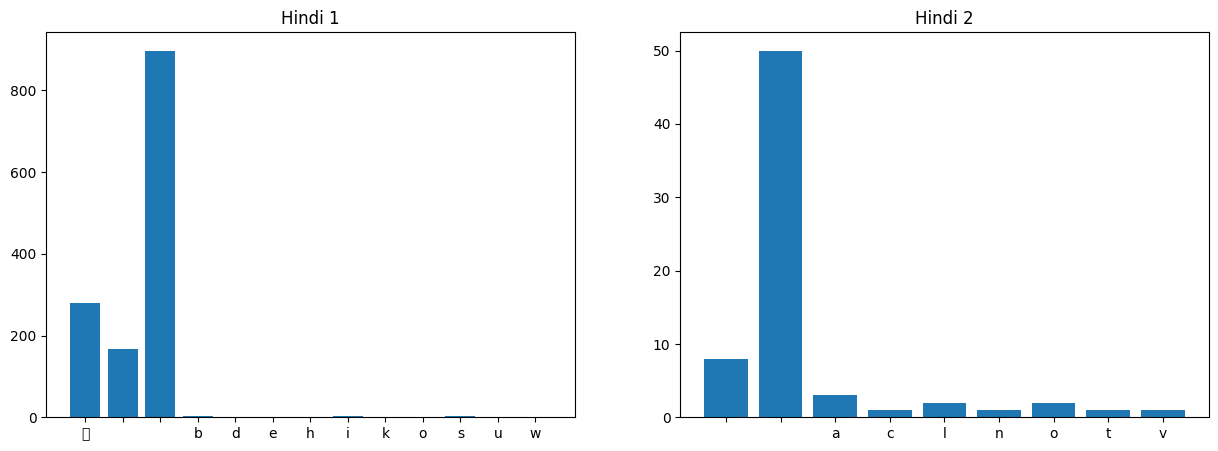

In [ ]:
from collections import Counter
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_hi1 = Counter(ngrams(hi1, 1))
keys, values = get_ngram_freq(unigram_hi1)
axs[0].bar(keys, values)
axs[0].set_title("Hindi 1")

unigram_hi2 = Counter(ngrams(hi2, 1))
keys, values = get_ngram_freq(unigram_hi2)
axs[1].bar(keys, values)
axs[1].set_title("Hindi 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


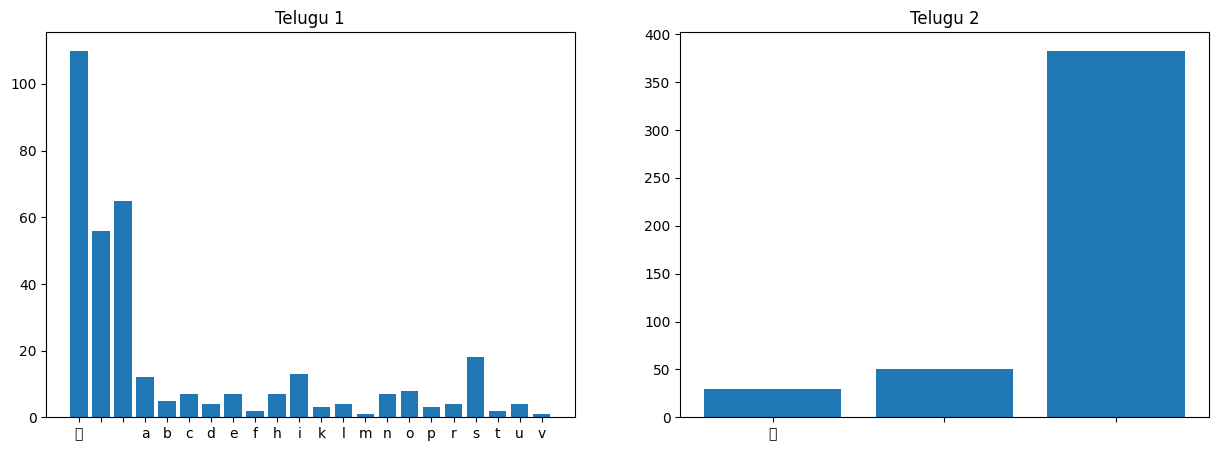

In [ ]:
from collections import Counter
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_te1 = Counter(ngrams(te1, 1))
keys, values = get_ngram_freq(unigram_te1)
axs[0].bar(keys, values)
axs[0].set_title("Telugu 1")

unigram_te2 = Counter(ngrams(te2, 1))
keys, values = get_ngram_freq(unigram_te2)
axs[1].bar(keys, values)
axs[1].set_title("Telugu 2")
plt.show()

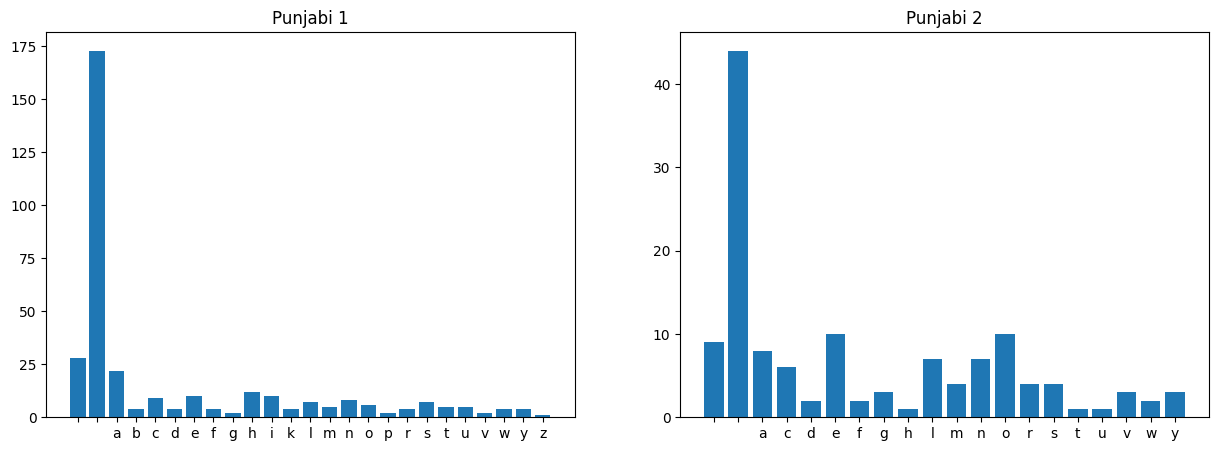

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
unigram_pa1 = Counter(ngrams(pa1, 1))
keys, values = get_ngram_freq(unigram_pa1)
axs[0].bar(keys, values)
axs[0].set_title("Punjabi 1")

unigram_pa2 = Counter(ngrams(pa2, 1))
keys, values = get_ngram_freq(unigram_pa2)
axs[1].bar(keys, values)
axs[1].set_title("Punjabi 2")
plt.show()

However, we don't have usual a-z letters in any of the regional languages.

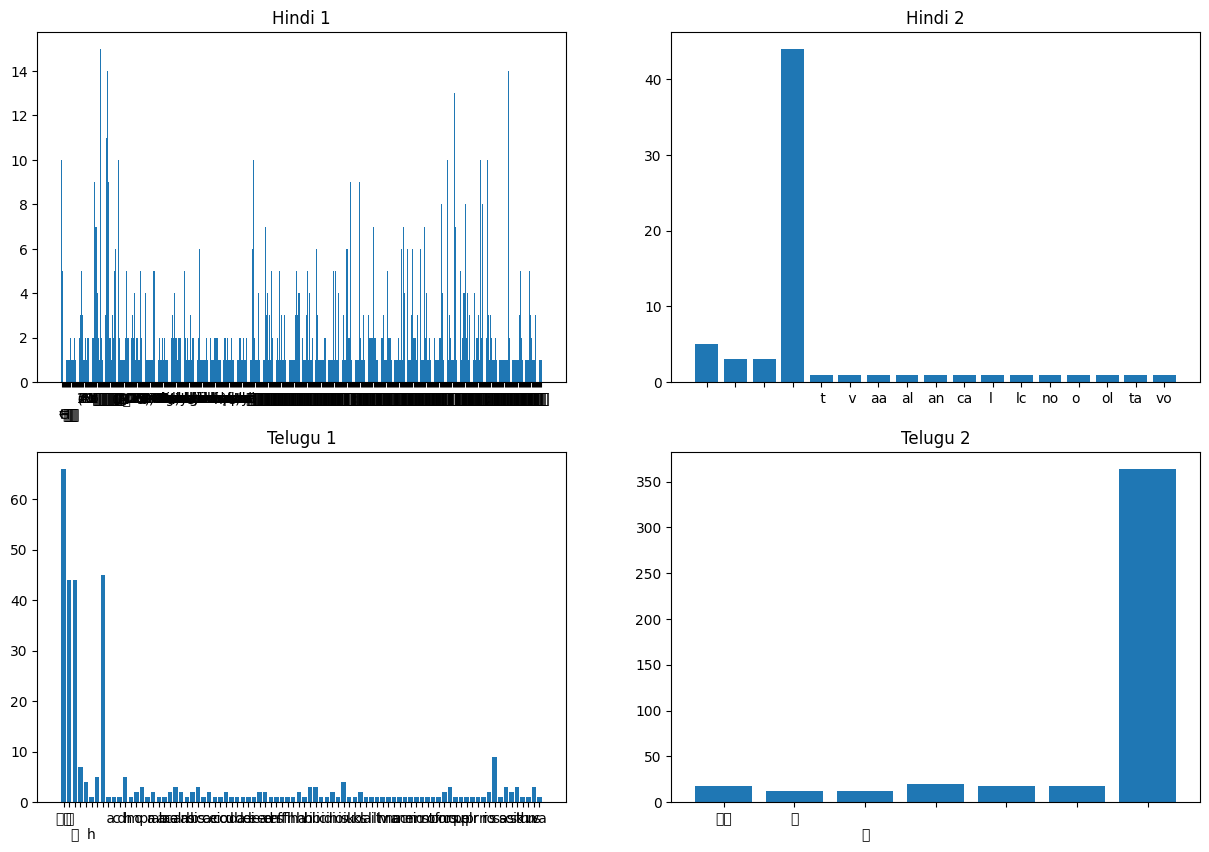

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
bigram_hi1 = Counter(ngrams(eng1, 2))
keys, values = get_ngram_freq(bigram_hi1)
axs[0, 0].bar(keys, values)
axs[0, 0].set_title("Hindi 1")

bigram_hi2 = Counter(ngrams(hi2, 2))
keys, values = get_ngram_freq(bigram_hi2)
axs[0, 1].bar(keys, values)
axs[0, 1].set_title("Hindi 2")

bigram_te1 = Counter(ngrams(te1, 2))
keys, values = get_ngram_freq(bigram_te1)
axs[1, 0].bar(keys, values)
axs[1, 0].set_title("Telugu 1")

bigram_te2 = Counter(ngrams(te2, 2))
keys, values = get_ngram_freq(bigram_te2)
axs[1, 1].bar(keys, values)
axs[1, 1].set_title("Telugu 2")
plt.show()


In [ ]:
bigram_pa1 = Counter(ngrams(pa1, 2))
keys, values = get_ngram_freq(bigram_pa1)
axs[1, 0].bar(keys, values)
axs[1, 0].set_title("Punjabi 1")

bigram_pa2 = Counter(ngrams(pa2, 2))
keys, values = get_ngram_freq(bigram_pa2)
axs[1, 1].bar(keys, values)
axs[1, 1].set_title("Punjabi 2")
plt.show()

Here, we can observe in bigrams of Hindi 1 and Telugu 1 it can easily be distinguished as seperate languages over the same topic. And also notice that the topics 1 & 2 are also not quite similar.

NameError: name 'triram_hi1' is not defined

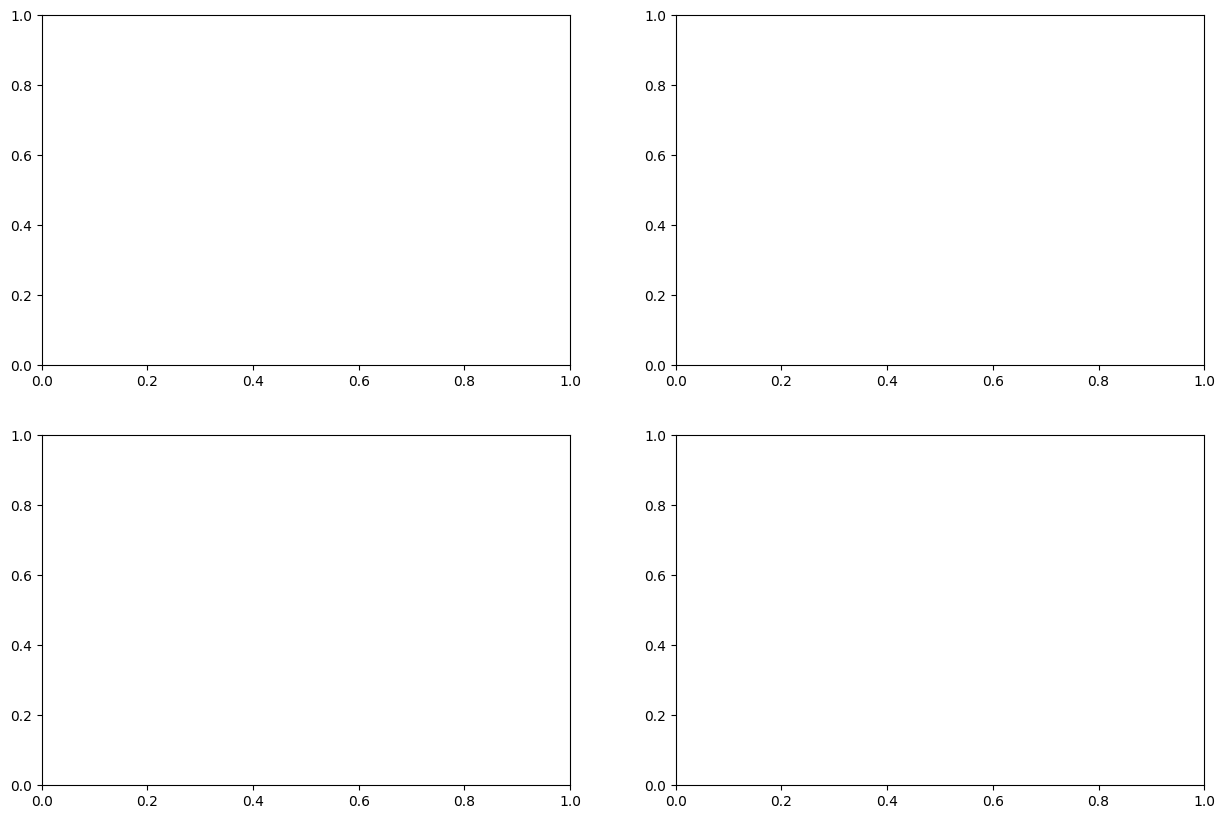

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
trigram_hi1 = Counter(ngrams(eng1, 2))
keys, values = get_ngram_freq(triram_hi1)
axs[0, 0, 0].bar(keys, values)
axs[0, 0, 0].set_title("Hindi 1")

trigram_hi2 = Counter(ngrams(hi2, 2))
keys, values = get_ngram_freq(trigram_hi2)
axs[0, 1].bar(keys, values)
axs[0, 1].set_title("Hindi 2")

trigram_te1 = Counter(ngrams(te1, 2))
keys, values = get_ngram_freq(trigram_te1)
axs[1, 0].bar(keys, values)
axs[1, 0].set_title("Telugu 1")

trigram_te2 = Counter(ngrams(te2, 2))
keys, values = get_ngram_freq(trigram_te2)
axs[1, 1].bar(keys, values)
axs[1, 1].set_title("Telugu 2")
plt.show()

**Explore:** Visualizing Trigrams or higher n-grams

**Exercise:** Try to extract trigrams and visualize the top 10 trigrams for each text.

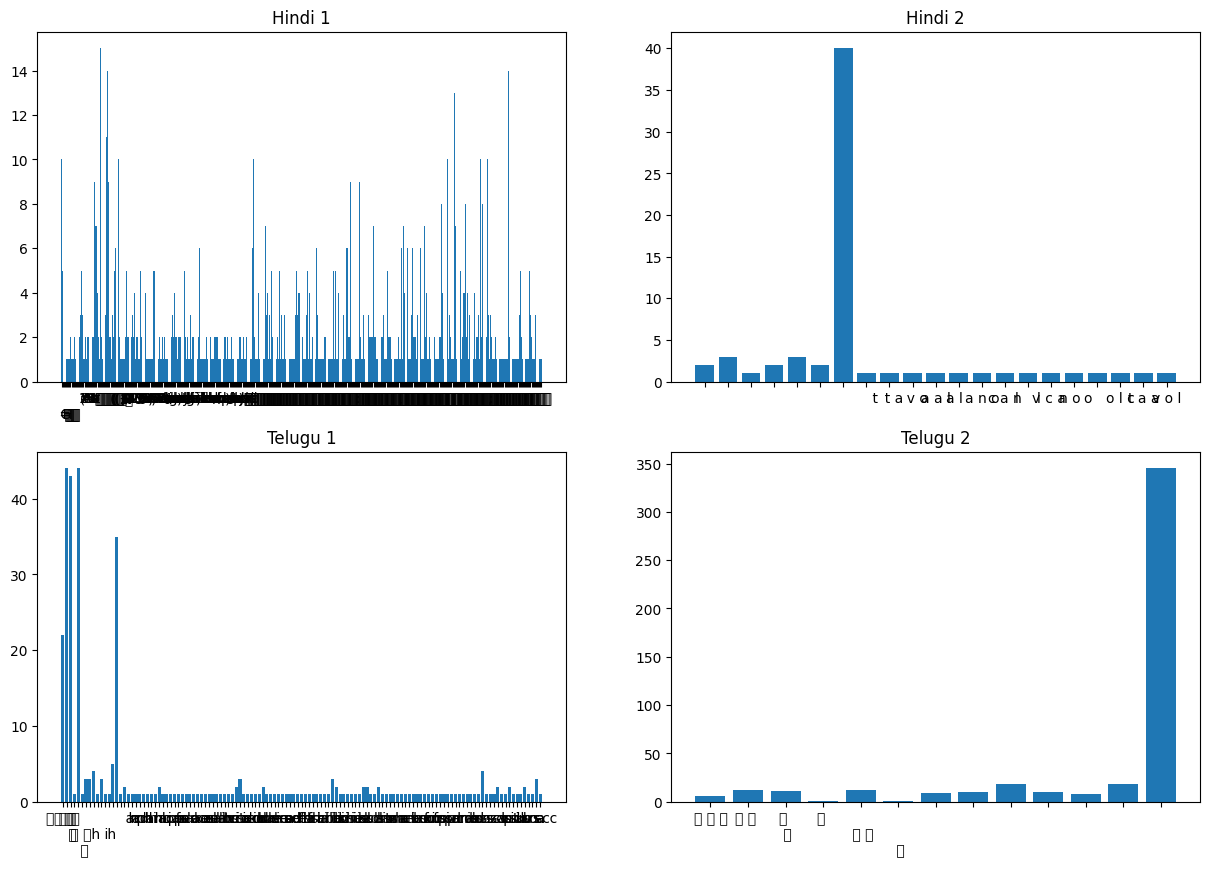

In [ ]:
#Trigrams
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# Hindi 1
keys, values = get_ngram_freq(trigram_hi1)
axs[0, 0].bar([' '.join(key) for key in keys], values)
axs[0, 0].set_title("Hindi 1")

# Hindi 2
keys, values = get_ngram_freq(trigram_hi2)
axs[0, 1].bar([' '.join(key) for key in keys], values)
axs[0, 1].set_title("Hindi 2")

# Telugu 1
keys, values = get_ngram_freq(trigram_te1)
axs[1, 0].bar([' '.join(key) for key in keys], values)
axs[1, 0].set_title("Telugu 1")

# Telugu 2
keys, values = get_ngram_freq(trigram_te2)
axs[1, 1].bar([' '.join(key) for key in keys], values)
axs[1, 1].set_title("Telugu 2")

plt.show()

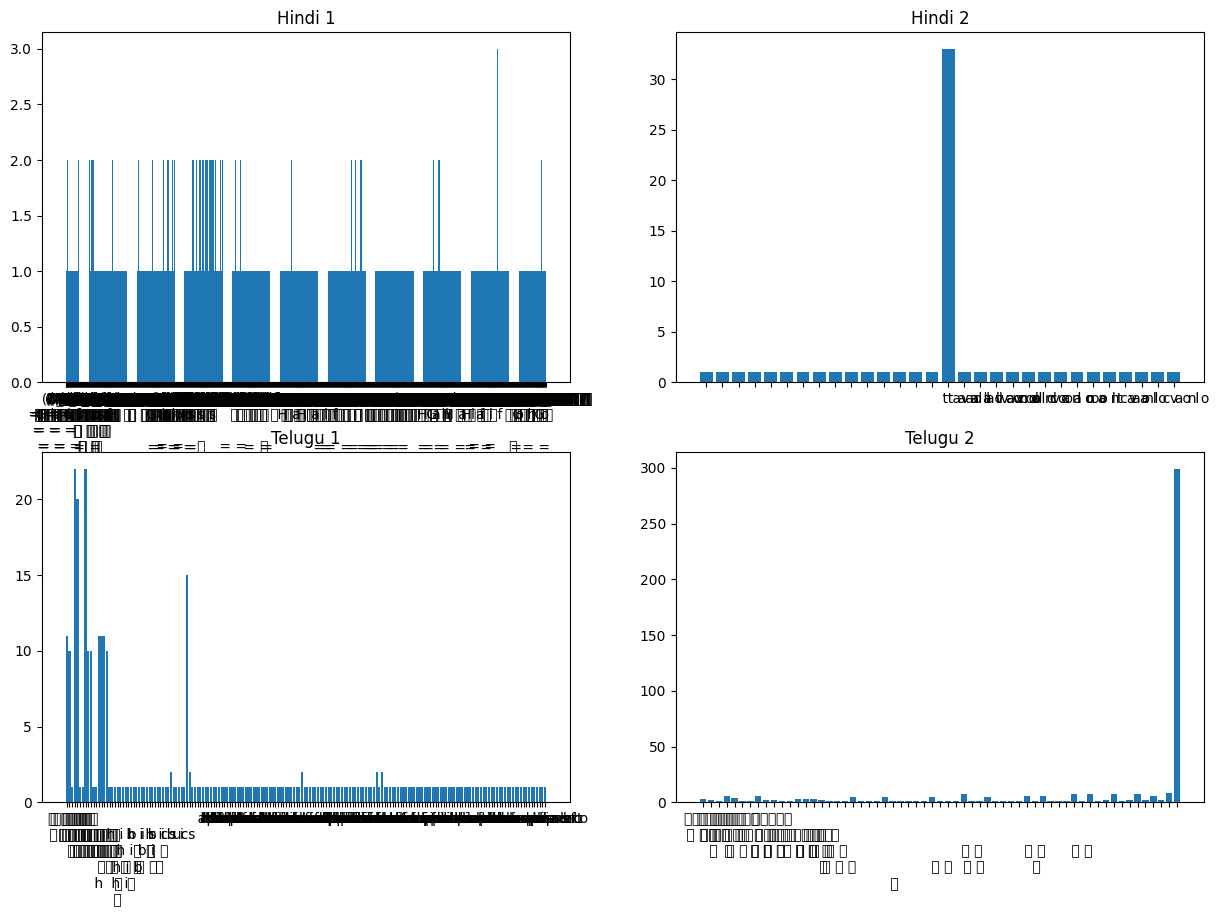

In [ ]:
# Generate 20-gram frequencies
def generate_ngrams(text, n):
    return Counter(ngrams(text, n))

ngram_size = 8

# Generate 8-gram frequencies
ngram_hi1 = generate_ngrams(eng1, ngram_size)
ngram_hi2 = generate_ngrams(hi2, ngram_size)
ngram_te1 = generate_ngrams(te1, ngram_size)
ngram_te2 = generate_ngrams(te2, ngram_size)

# Create plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Hindi 1
keys, values = get_ngram_freq(ngram_hi1)
axs[0, 0].bar([' '.join(key) for key in keys], values)
axs[0, 0].set_title("Hindi 1")

# Hindi 2
keys, values = get_ngram_freq(ngram_hi2)
axs[0, 1].bar([' '.join(key) for key in keys], values)
axs[0, 1].set_title("Hindi 2")

# Telugu 1
keys, values = get_ngram_freq(ngram_te1)
axs[1, 0].bar([' '.join(key) for key in keys], values)
axs[1, 0].set_title("Telugu 1")

# Telugu 2
keys, values = get_ngram_freq(ngram_te2)
axs[1, 1].bar([' '.join(key) for key in keys], values)
axs[1, 1].set_title("Telugu 2")

plt.show()

In [ ]:
def ind2tup(ind):
    ind = int(ind)
    i = int(ind / 26)
    j = int(ind % 26)
    return (chr(ord("a") + i), chr(ord("a") + j))


def ShowTopN(trifreq, n=10):
    f = trifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        print(f"{ind2tup(arg[ii])} : {f[arg[ii]]}")

In [ ]:
print("\nHindi 1:")
ShowTopN(trigram_hi1_freq)

print("\nHindi 2:")
ShowTopN(trigram_hi2_freq)

print("\nTelugu 1:")
ShowTopN(trigram_te1_freq)

print("\nTelugu 2:")
ShowTopN(trigram_te2_freq)


Hindi 1:


NameError: name 'trigram_hi1_freq' is not defined

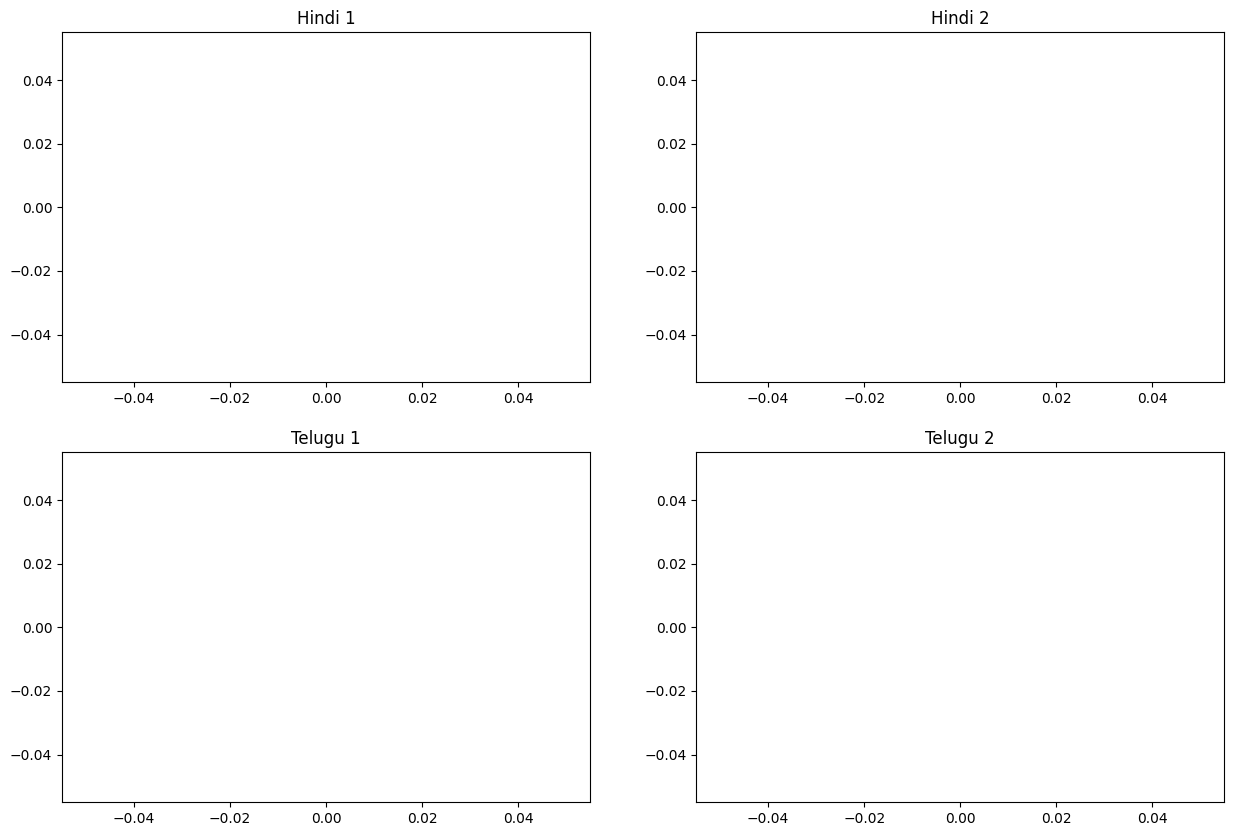

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams

# Define or import your `get_ngram_freq` function
def get_ngram_freq(ngram_counter):
    keys = list(ngram_counter.keys())
    values = list(ngram_counter.values())
    return keys, values

# Example texts (make sure these variables are defined)
eng1 = "Your English text here 1".split()
hi2 = "Your Hindi text here 2".split()
te1 = "Your Telugu text here 1".split()
te2 = "Your Telugu text here 2".split()


# Create plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Hindi 1
keys, values = get_ngram_freq(ngram_hi1)
axs[0, 0].bar([' '.join(key) for key in keys], values)
axs[0, 0].set_title("Hindi 1")

# Hindi 2
keys, values = get_ngram_freq(ngram_hi2)
axs[0, 1].bar([' '.join(key) for key in keys], values)
axs[0, 1].set_title("Hindi 2")

# Telugu 1
keys, values = get_ngram_freq(ngram_te1)
axs[1, 0].bar([' '.join(key) for key in keys], values)
axs[1, 0].set_title("Telugu 1")

# Telugu 2
keys, values = get_ngram_freq(ngram_te2)
axs[1, 1].bar([' '.join(key) for key in keys], values)
axs[1, 1].set_title("Telugu 2")

plt.show()


**Part 2: **Written numbers

In [ ]:
from keras.datasets import mnist

# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
no1 = train_X[train_y == 1, :, :]
no0 = train_X[train_y == 0, :, :]

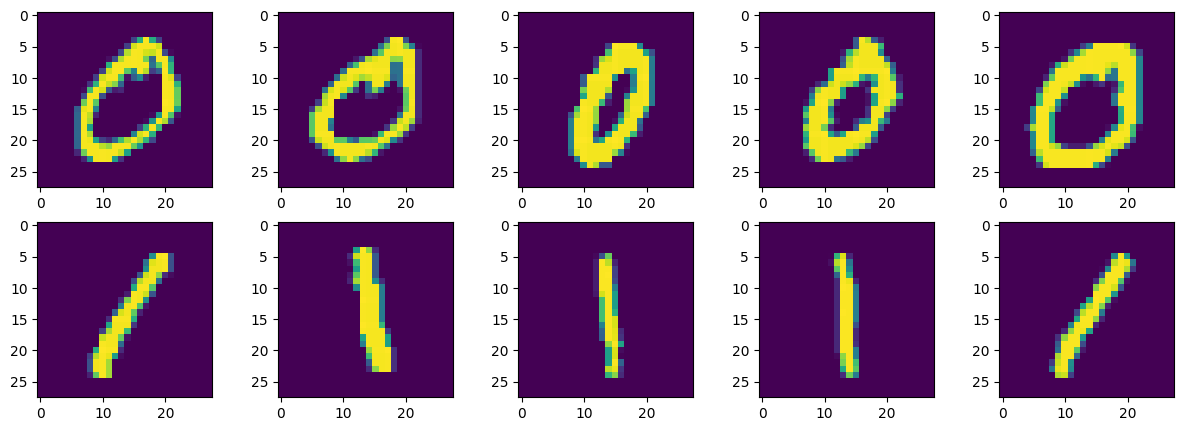

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(15, 5))

for ii in range(5):
    axs[0, ii].imshow(no0[ii, :, :])

for ii in range(5):
    axs[1, ii].imshow(no1[ii, :, :])
plt.show()

In [ ]:
sum1 = np.sum(no1 > 0, (1, 2))
sum0 = np.sum(no0 > 0, (1, 2))

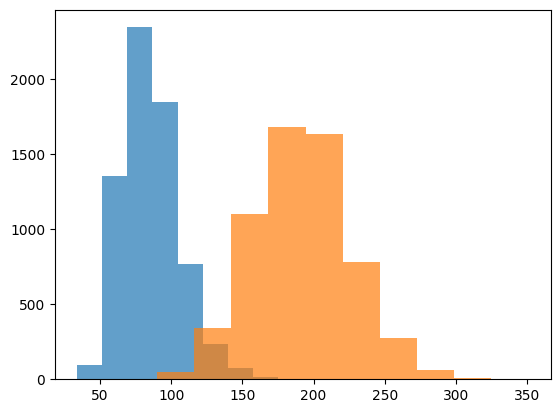

In [ ]:
plt.hist(sum1, alpha=0.7)
plt.hist(sum0, alpha=0.7)
plt.show()

In [ ]:
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = (
            img2[ii, :] + img2[ii - 1, :]
        )
    img2 = img2 > 0
    return img2

def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )
    hole = hull & ~(img > 0)
    return hole

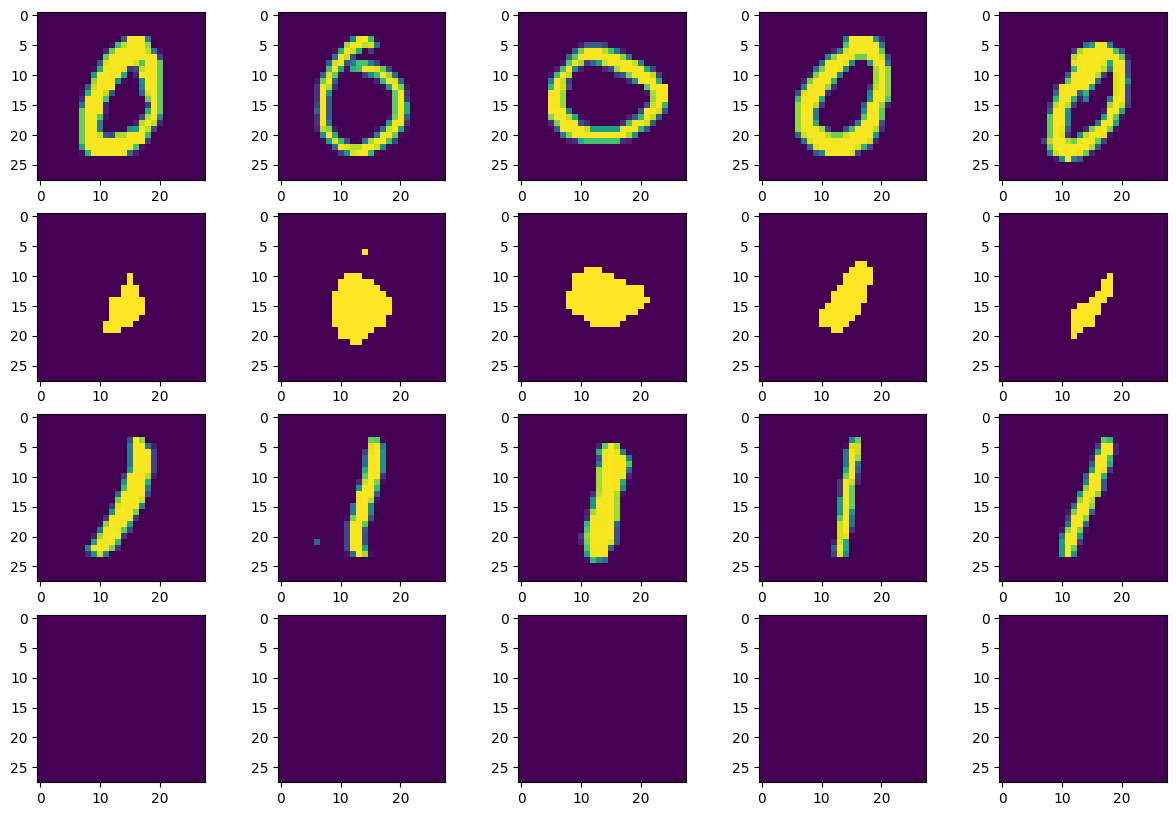

In [ ]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHolePixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHolePixels(no1[idx, :, :]))

(array([ 163.,  663., 1199., 1355., 1138.,  834.,  401.,  127.,   36.,
           7.]),
 array([  0. ,  18.9,  37.8,  56.7,  75.6,  94.5, 113.4, 132.3, 151.2,
        170.1, 189. ]),
 <BarContainer object of 10 artists>)

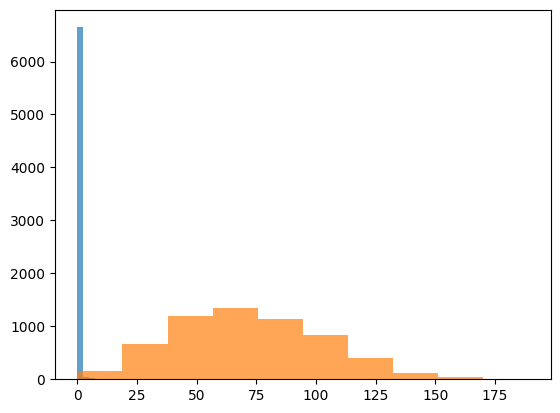

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7)
plt.hist(hole0, alpha=0.7)

In [ ]:
def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    return hull

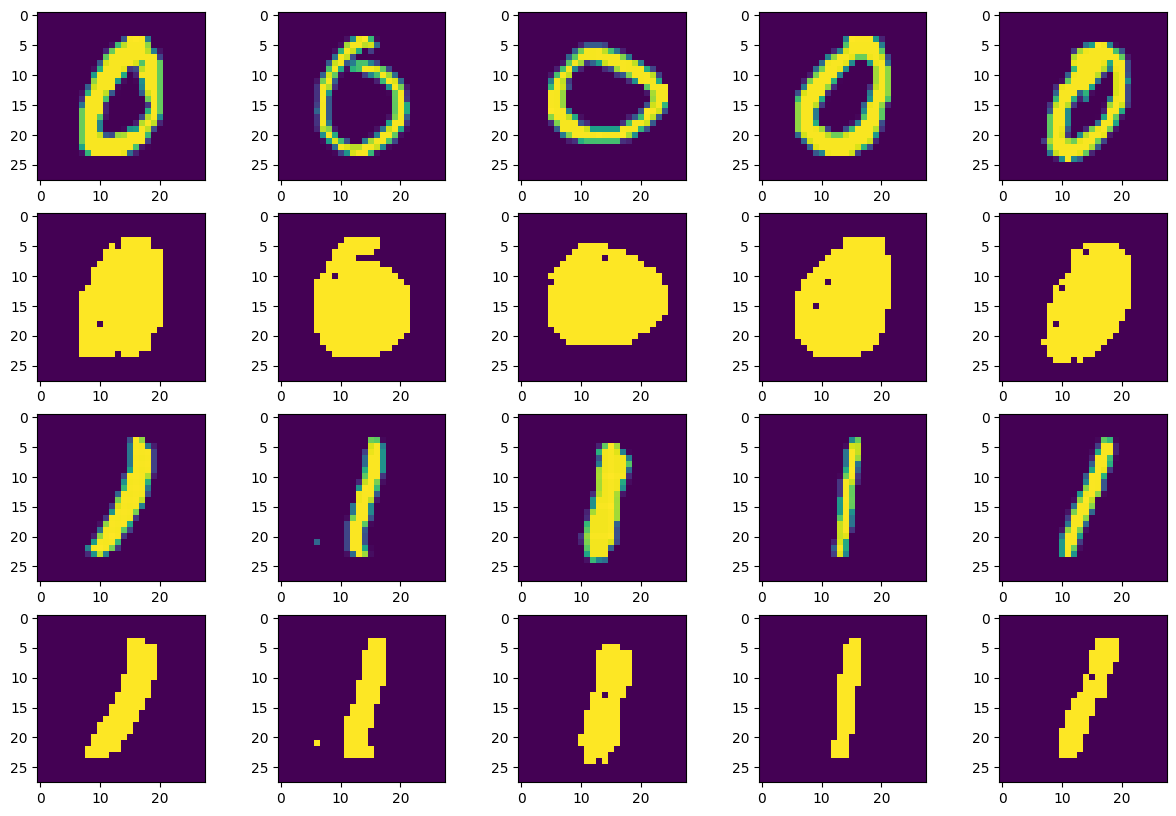

In [ ]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHullPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHullPixels(no1[idx, :, :]))

(array([  10.,   64.,  245.,  611., 1042., 1379., 1395.,  917.,  251.,
           9.]),
 array([113. , 139.3, 165.6, 191.9, 218.2, 244.5, 270.8, 297.1, 323.4,
        349.7, 376. ]),
 <BarContainer object of 10 artists>)

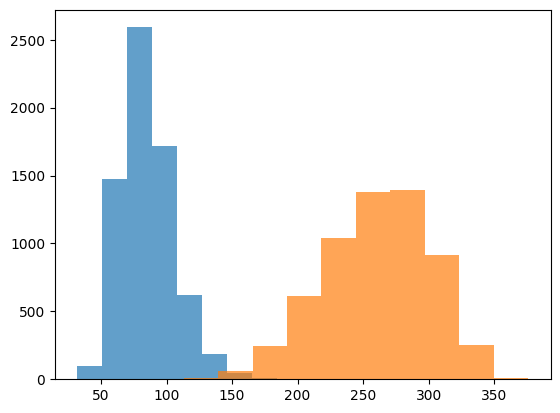

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7)
plt.hist(hull0, alpha=0.7)

In [ ]:
def minus(a, b):
    return a & ~b


def getBoundaryPixels(img):
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

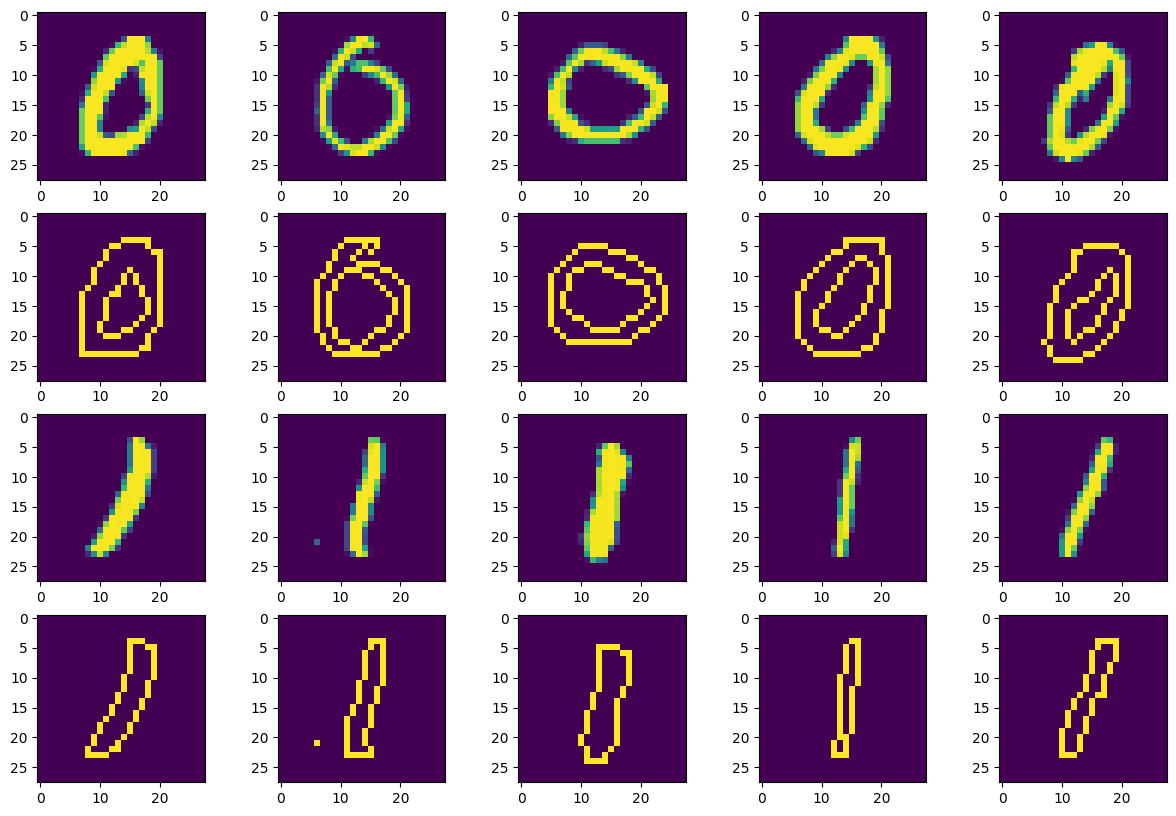

In [ ]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getBoundaryPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getBoundaryPixels(no1[idx, :, :]))

(array([  14.,   21.,   99.,  450., 1300., 2262., 1339.,  375.,   52.,
          11.]),
 array([ 48. ,  55.2,  62.4,  69.6,  76.8,  84. ,  91.2,  98.4, 105.6,
        112.8, 120. ]),
 <BarContainer object of 10 artists>)

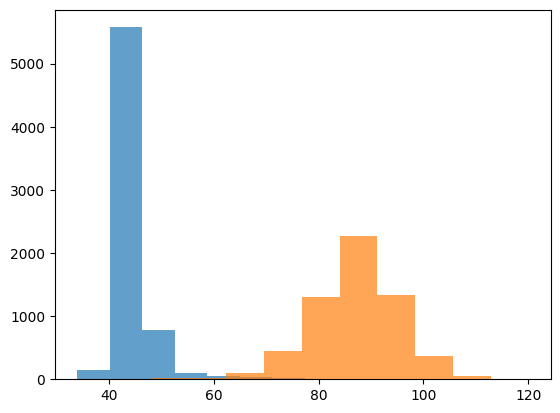

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0 = np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7)
plt.hist(bound0, alpha=0.7)

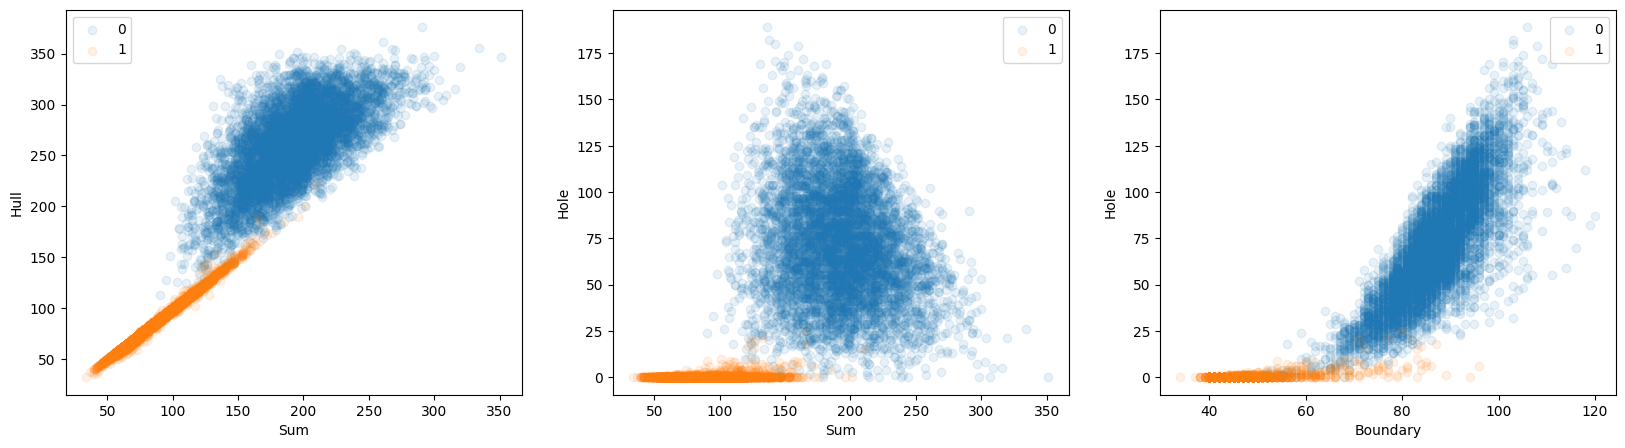

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].scatter(sum0, hull0, alpha=0.1)
axs[0].scatter(sum1, hull1, alpha=0.1)
axs[0].set_xlabel("Sum")
axs[0].set_ylabel("Hull")
axs[0].legend(["0", "1"])

axs[1].scatter(sum0, hole0, alpha=0.1)
axs[1].scatter(sum1, hole1, alpha=0.1)
axs[1].set_xlabel("Sum")
axs[1].set_ylabel("Hole")
axs[1].legend(["0", "1"])

axs[2].scatter(bound0, hole0, alpha=0.1)
axs[2].scatter(bound1, hole1, alpha=0.1)
axs[2].set_xlabel("Boundary")
axs[2].set_ylabel("Hole")
axs[2].legend(["0", "1"])
plt.show()

In [ ]:
cl1 = ["class 1"] * len(sum1)
cl0 = ["class 0"] * len(sum0)
df = pd.DataFrame(
    list(
        zip(
            np.concatenate((hole0, hole0)),
            np.concatenate((sum1, sum0)),
            np.concatenate((bound1, bound0)),
            np.concatenate((cl1, cl0)),
        )
    ),
    columns=["Hole", "Sum", "Boundary", "Class"],
)
df.head()
fig = px.scatter_3d(df, x="Hole", y="Sum", z="Boundary",
                    color="Class", opacity=0.1)
fig.show()

**Explore**:

1) Which is the best combination of features?
  - Using techniques like boundary pixels and hole pixels to visualize feature
    correlations and identify which combinations might be more informative.

2) How would you test or visualize four or more features?
  -  For four features or more, we can use scatter plot matrices to visualize
     the relationships between each pair of features.

3) Can you come up with your own features?
  - As given above by combining two features together can cause distinction among two classes. So if we use any statistical tools or simple operations on two or more classes it my be possible to be able to call it as a new feature. (My assumption)

4) Will these features work for different classes other than 0 and 1?
  - These featurs could work for different classes provided it is broadly generalized and satisfies the constraints even in other classes.

5) What will happen if we take more that two classes at a time?
  - We can culminate a few features to capture the nuances between multiple classes effectively or could try heatmaps since colors represent different features, making it easy to see patterns.


In [ ]:
from keras.datasets import mnist

# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
no1 = train_X[train_y == 1, :, :]
no0 = train_X[train_y == 0, :, :]
no2 = train_X[train_y == 2, :, :]

IndexError: index 2 is out of bounds for axis 0 with size 2

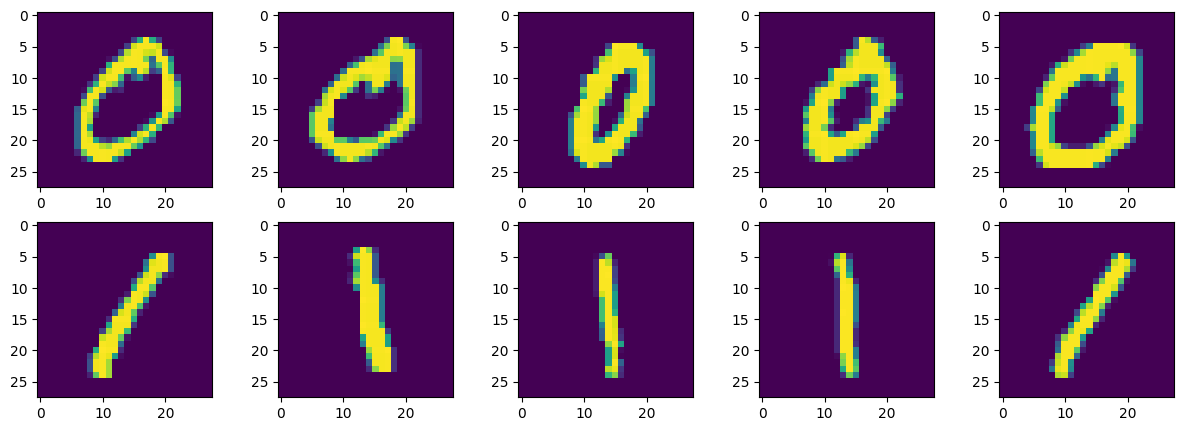

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(15, 5))

for ii in range(5):
    axs[0, ii].imshow(no0[ii, :, :])

for ii in range(5):
    axs[1, ii].imshow(no1[ii, :, :])

for ii in range(5):
    axs[2, ii].imshow(no2[ii, :, :])


plt.show()

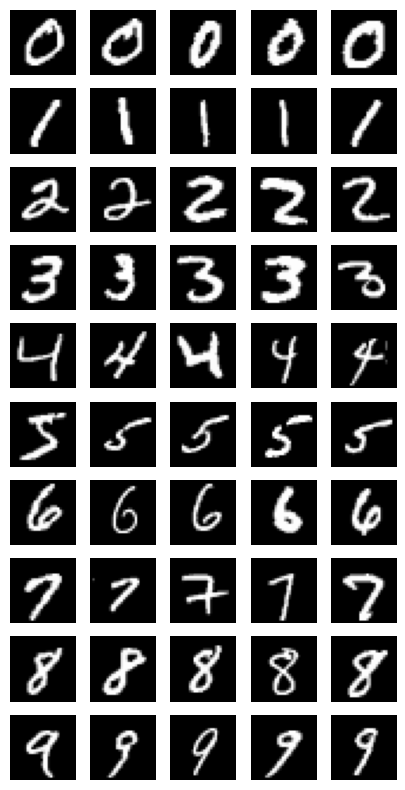

In [ ]:
# Extract images for each digit
digit_images = [train_X[train_y == i, :, :] for i in range(10)]

# Create a figure with 10 rows and 5 columns of subplots
fig, axs = plt.subplots(10, 5, figsize=(5, 10))

# Plot images for each digit
for digit in range(10):
    for ii in range(5):
        axs[digit, ii].imshow(digit_images[digit][ii, :, :], cmap='gray')
        axs[digit, ii].axis('off')  # Hide the axis

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Summing of all pixels
sum0 = np.sum(no0 > 0, (1, 2))
sum1 = np.sum(no1 > 0, (1, 2))
sum2 = np.sum(no2 > 0, (1, 2))
sum3 = np.sum(no3 > 0, (1, 2))
sum4 = np.sum(no4 > 0, (1, 2))
sum5 = np.sum(no5 > 0, (1, 2))
sum6 = np.sum(no6 > 0, (1, 2))
sum7 = np.sum(no7 > 0, (1, 2))
sum8 = np.sum(no8 > 0, (1, 2))
sum9 = np.sum(no9 > 0, (1, 2))

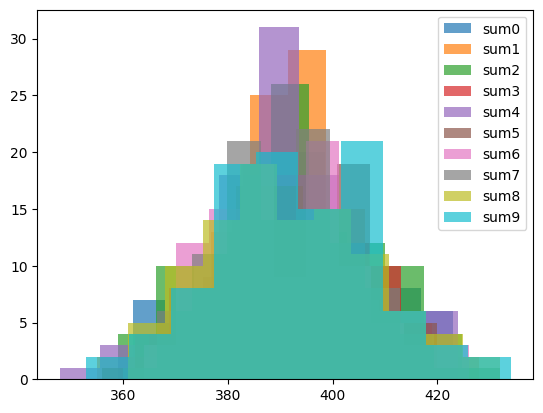

In [ ]:
# Plotting histograms for all the sums
plt.hist(sum0, alpha=0.7, label='sum0')
plt.hist(sum1, alpha=0.7, label='sum1')
plt.hist(sum2, alpha=0.7, label='sum2')
plt.hist(sum3, alpha=0.7, label='sum3')
plt.hist(sum4, alpha=0.7, label='sum4')
plt.hist(sum5, alpha=0.7, label='sum5')
plt.hist(sum6, alpha=0.7, label='sum6')
plt.hist(sum7, alpha=0.7, label='sum7')
plt.hist(sum8, alpha=0.7, label='sum8')
plt.hist(sum9, alpha=0.7, label='sum9')

plt.legend()
plt.show()

(array([18., 18., 34., 14.,  6.,  6.,  1.,  2.,  0.,  1.]),
 array([ 1. ,  4.3,  7.6, 10.9, 14.2, 17.5, 20.8, 24.1, 27.4, 30.7, 34. ]),
 <BarContainer object of 10 artists>)

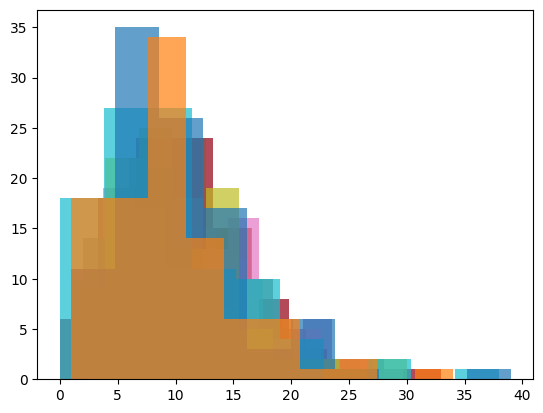

In [ ]:
#Hole Pixels
hole0 = np.array([getHolePixels(i).sum() for i in no0])
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole3 = np.array([getHolePixels(i).sum() for i in no3])
hole4 = np.array([getHolePixels(i).sum() for i in no4])
hole5 = np.array([getHolePixels(i).sum() for i in no5])
hole6 = np.array([getHolePixels(i).sum() for i in no6])
hole7 = np.array([getHolePixels(i).sum() for i in no7])
hole8 = np.array([getHolePixels(i).sum() for i in no8])
hole9 = np.array([getHolePixels(i).sum() for i in no9])

plt.hist(hole1, alpha=0.7)
plt.hist(hole0, alpha=0.7)
plt.hist(hole0, alpha=0.7)
plt.hist(hole1, alpha=0.7)
plt.hist(hole2, alpha=0.7)
plt.hist(hole3, alpha=0.7)
plt.hist(hole4, alpha=0.7)
plt.hist(hole5, alpha=0.7)
plt.hist(hole6, alpha=0.7)
plt.hist(hole7, alpha=0.7)
plt.hist(hole8, alpha=0.7)
plt.hist(hole9, alpha=0.7)

In [ ]:
#Hull Pixel
def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    return hull


IndexError: index 236 is out of bounds for axis 0 with size 100

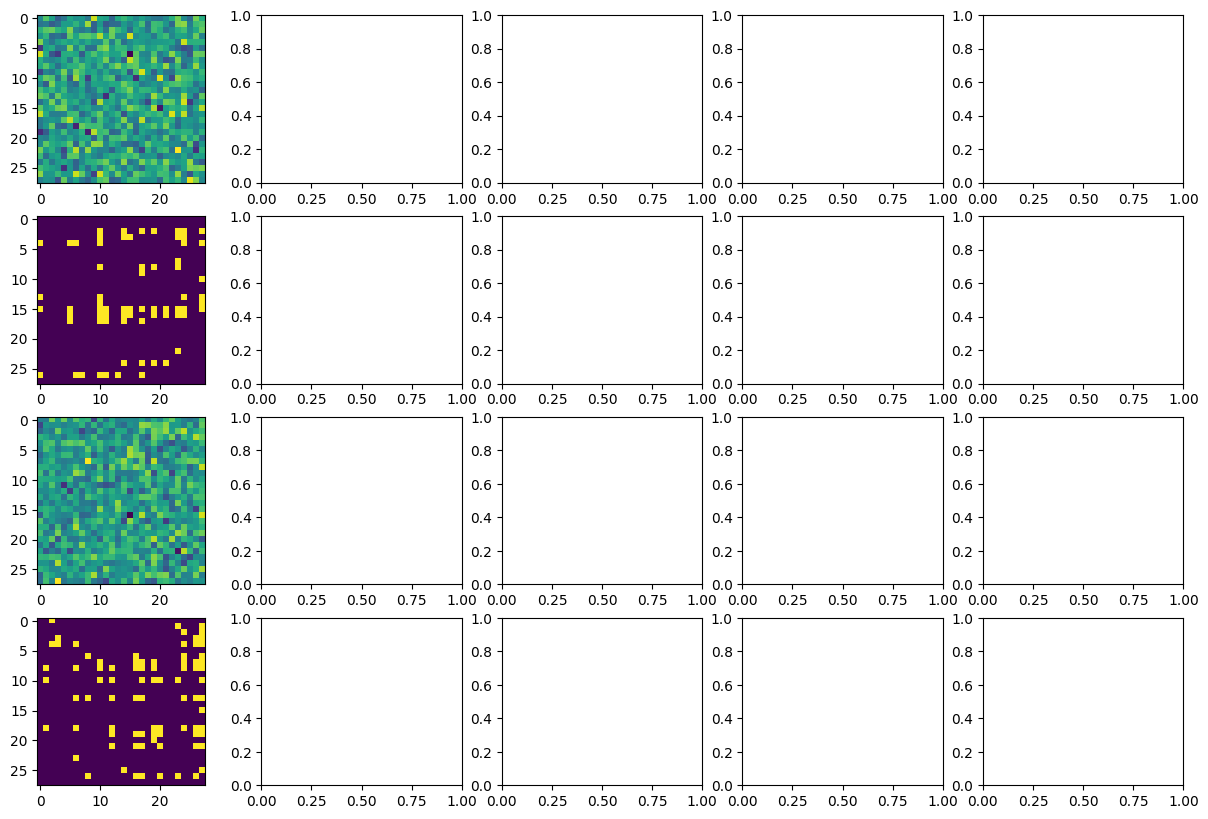

In [ ]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHullPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHullPixels(no1[idx, :, :]))

(array([ 7., 13., 26., 24., 15.,  4.,  5.,  1.,  4.,  1.]),
 array([ 18. ,  32.6,  47.2,  61.8,  76.4,  91. , 105.6, 120.2, 134.8,
        149.4, 164. ]),
 <BarContainer object of 10 artists>)

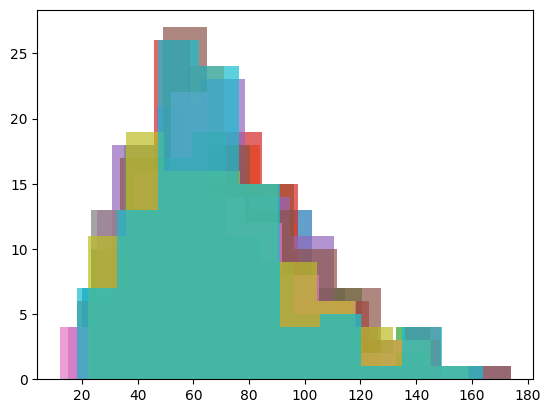

In [ ]:
hull0 = np.array([getHullPixels(i).sum() for i in no0])
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull2 = np.array([getHullPixels(i).sum() for i in no2])
hull3 = np.array([getHullPixels(i).sum() for i in no3])
hull4 = np.array([getHullPixels(i).sum() for i in no4])
hull5 = np.array([getHullPixels(i).sum() for i in no5])
hull6 = np.array([getHullPixels(i).sum() for i in no6])
hull7 = np.array([getHullPixels(i).sum() for i in no7])
hull8 = np.array([getHullPixels(i).sum() for i in no8])
hull9 = np.array([getHullPixels(i).sum() for i in no9])

plt.hist(hull0, alpha=0.7)
plt.hist(hull1, alpha=0.7)
plt.hist(hull2, alpha=0.7)
plt.hist(hull3, alpha=0.7)
plt.hist(hull4, alpha=0.7)
plt.hist(hull5, alpha=0.7)
plt.hist(hull6, alpha=0.7)
plt.hist(hull7, alpha=0.7)
plt.hist(hull8, alpha=0.7)
plt.hist(hull9, alpha=0.7)

In [ ]:
#Boundary Pixels
def minus(a, b):
    return a & ~b


def getBoundaryPixels(img):
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

IndexError: index 345 is out of bounds for axis 0 with size 100

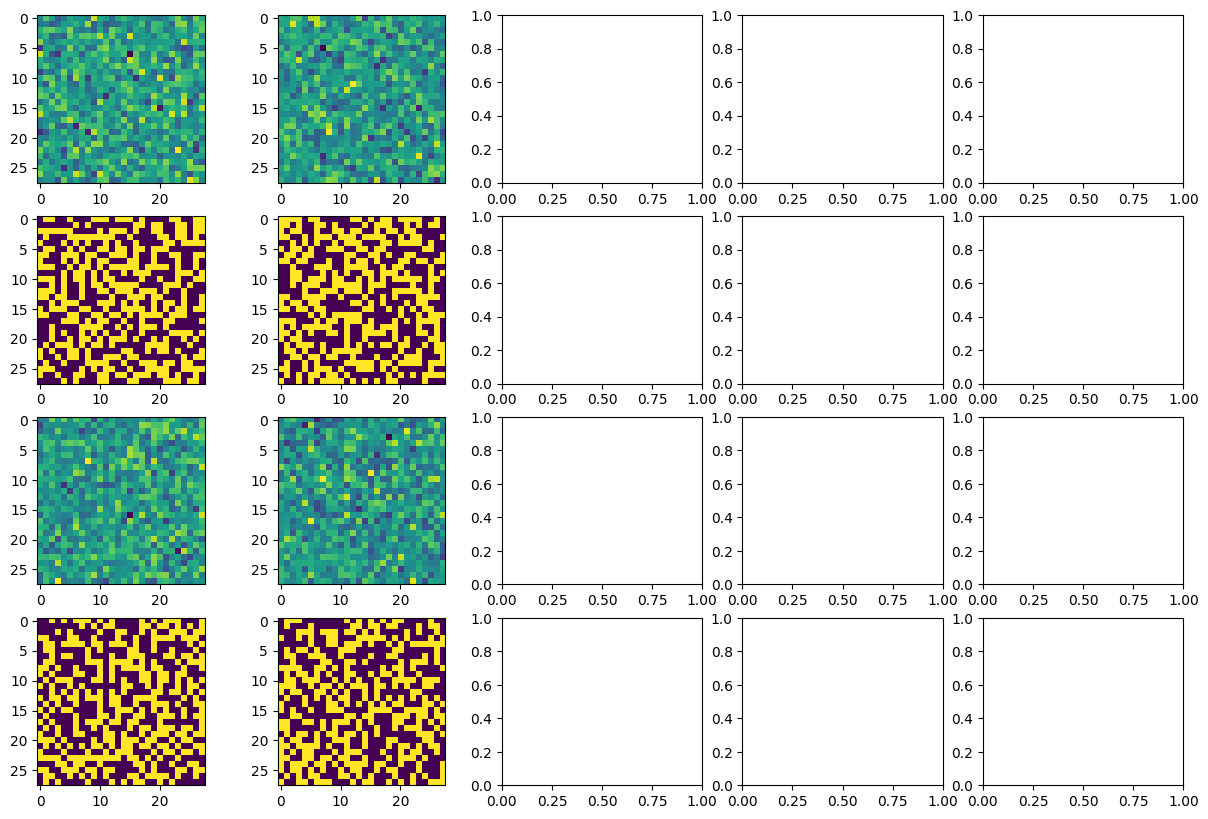

In [ ]:
img_ids = [12, 99, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getBoundaryPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getBoundaryPixels(no1[idx, :, :]))

(array([ 2.,  0.,  5., 13., 22., 22., 21.,  5.,  7.,  3.]),
 array([334. , 340.3, 346.6, 352.9, 359.2, 365.5, 371.8, 378.1, 384.4,
        390.7, 397. ]),
 <BarContainer object of 10 artists>)

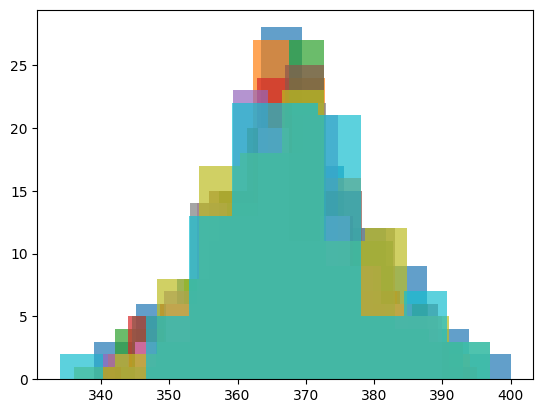

In [ ]:
bound0 = np.array([getBoundaryPixels(i).sum() for i in no0])
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound2 = np.array([getBoundaryPixels(i).sum() for i in no2])
bound3 = np.array([getBoundaryPixels(i).sum() for i in no3])
bound4 = np.array([getBoundaryPixels(i).sum() for i in no4])
bound5 = np.array([getBoundaryPixels(i).sum() for i in no5])
bound6 = np.array([getBoundaryPixels(i).sum() for i in no6])
bound7 = np.array([getBoundaryPixels(i).sum() for i in no7])
bound8 = np.array([getBoundaryPixels(i).sum() for i in no8])
bound9 = np.array([getBoundaryPixels(i).sum() for i in no9])

plt.hist(bound0, alpha=0.7)
plt.hist(bound1, alpha=0.7)
plt.hist(bound2, alpha=0.7)
plt.hist(bound3, alpha=0.7)
plt.hist(bound4, alpha=0.7)
plt.hist(bound5, alpha=0.7)
plt.hist(bound6, alpha=0.7)
plt.hist(bound7, alpha=0.7)
plt.hist(bound8, alpha=0.7)
plt.hist(bound9, alpha=0.7)

ValueError: x and y must be the same size

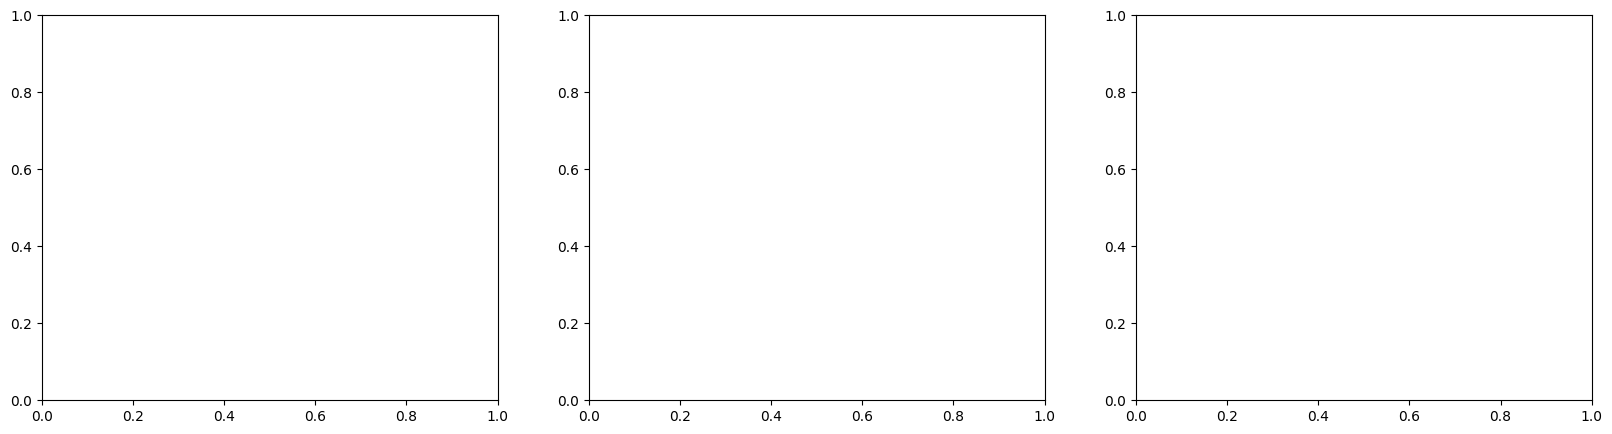

In [ ]:
#Two features together
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].scatter(sum0, hull0, alpha=0.1)
axs[0].scatter(sum1, hull1, alpha=0.1)
axs[0].scatter(sum2, hull2, alpha=0.1)
axs[0].scatter(sum3, hull3, alpha=0.1)
axs[0].scatter(sum4, hull4, alpha=0.1)
axs[0].scatter(sum5, hull5, alpha=0.1)
axs[0].scatter(sum6, hull6, alpha=0.1)
axs[0].scatter(sum7, hull7, alpha=0.1)
axs[0].scatter(sum8, hull8, alpha=0.1)
axs[0].scatter(sum9, hull9, alpha=0.1)

axs[0].set_xlabel("Sum")
axs[0].set_ylabel("Hull")
axs[0].legend(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

axs[1].scatter(sum0, hole0, alpha=0.1)
axs[1].scatter(sum1, hole1, alpha=0.1)
axs[1].scatter(sum2, hole2, alpha=0.1)
axs[1].scatter(sum3, hole3, alpha=0.1)
axs[1].scatter(sum4, hole4, alpha=0.1)
axs[1].scatter(sum5, hole5, alpha=0.1)
axs[1].scatter(sum6, hole6, alpha=0.1)
axs[1].scatter(sum7, hole7, alpha=0.1)
axs[1].scatter(sum8, hole8, alpha=0.1)
axs[1].scatter(sum9, hole9, alpha=0.1)

axs[1].set_xlabel("Sum")
axs[1].set_ylabel("Hole")
axs[1].legend(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

axs[2].scatter(bound0, hole0, alpha=0.1)
axs[2].scatter(bound1, hole1, alpha=0.1)
axs[2].scatter(bound2, hole2, alpha=0.1)
axs[2].scatter(bound3, hole3, alpha=0.1)
axs[2].scatter(bound4, hole4, alpha=0.1)
axs[2].scatter(bound5, hole5, alpha=0.1)
axs[2].scatter(bound6, hole6, alpha=0.1)
axs[2].scatter(bound7, hole7, alpha=0.1)
axs[2].scatter(bound8, hole8, alpha=0.1)
axs[2].scatter(bound9, hole9, alpha=0.1)

axs[2].set_xlabel("Boundary")
axs[2].set_ylabel("Hole")
axs[2].legend(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
plt.show()

In [ ]:
#Plot 3 features together
cl0 = ["class 0"] * len(sum0)
cl1 = ["class 1"] * len(sum1)
cl2 = ["class 2"] * len(sum2)
cl3 = ["class 3"] * len(sum3)
cl4 = ["class 4"] * len(sum4)
cl5 = ["class 5"] * len(sum5)
cl6 = ["class 6"] * len(sum6)
cl7 = ["class 7"] * len(sum7)
cl8 = ["class 8"] * len(sum8)
cl9 = ["class 9"] * len(sum9)

df = pd.DataFrame(
    list(
        zip(
            np.concatenate((hole0, hole0)),
            np.concatenate((sum1, sum0)),
            np.concatenate((bound1, bound0)),
            np.concatenate((cl1, cl0)),
        )
    ),
    columns=["Hole", "Sum", "Boundary", "Class"],
)
df.head()
fig = px.scatter_3d(df, x="Hole", y="Sum", z="Boundary",
                    color="Class", opacity=0.1)
fig.show()
